In [1]:
#############################
# Exploratory data analysis #
#############################
# import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read cleaned train data:
df_cleaned = pd.read_csv('stroke_train_cleaned.csv')
# Remove unnamed column:
df_cleaned = df_cleaned.drop(['Unnamed: 0'], axis=1)

# Check dataframe info.:
df_cleaned.info()
# Check number of missing values:
df_cleaned.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42512 entries, 0 to 42511
Data columns (total 11 columns):
gender               42512 non-null object
age                  42512 non-null float64
hypertension         42512 non-null object
heart_disease        42512 non-null object
ever_married         42512 non-null object
work_type            42512 non-null object
Residence_type       42512 non-null object
avg_glucose_level    42512 non-null float64
bmi                  42512 non-null float64
smoking_status       42512 non-null object
stroke               42512 non-null int64
dtypes: float64(3), int64(1), object(7)
memory usage: 3.6+ MB


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [2]:
# Compute summary stat.: post-data cleansing 
df_summary_post = df_cleaned.describe().T
# Reorder columns order in summary dataframe
df_summary_post = df_summary_post[['count','min','max','mean','25%','50%','75%','std']]
# drop non-numerical and meaningless features
df_summary_post = df_summary_post.drop(['stroke'])
df_summary_post

,count,min,max,mean,25%,50%,75%,std
age,42512.0,0.08,82.00,42.152959,24.0000,44.000,60.0000,22.655211
avg_glucose_level,42512.0,55.00,291.05,104.066140,77.4975,91.485,111.7225,42.639886
bmi,42512.0,10.10,47.40,28.056657,23.3000,27.600,32.2000,6.774594


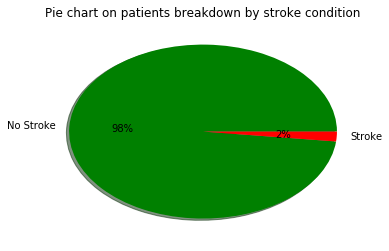

In [3]:
# Q1. Count frequencies and shows patients breakdown by stroke condition:
df_group_stroke = pd.DataFrame(df_cleaned.groupby('stroke')['stroke'].count())
df_group_stroke.columns = ['count']
plt.pie(df_group_stroke, labels=['No Stroke','Stroke'], autopct='%.0f%%', colors=['green','red'], shadow=True)
plt.title('Pie chart on patients breakdown by stroke condition')
plt.show()

In [4]:
# Count frequencies: demographic factors on a stroke condition
df_cleaned.groupby(['stroke','gender'])['gender'].count().sort_values(ascending=False) 

stroke  gender
0       Female    24597
        Male      17132
1       Female      425
        Male        347
0       Other        11
Name: gender, dtype: int64

In [5]:
# Count frequencies: demographic factors on a stroke condition
df_grp_gender = pd.DataFrame(df_cleaned.groupby(['stroke','gender'])['gender'].count())
df_grp_gender.columns = ['count']
df_grp_marital = pd.DataFrame(df_cleaned.groupby(['stroke','ever_married'])['ever_married'].count().sort_values(ascending=False))
df_grp_marital.columns = ['count']
df_grp_residential = pd.DataFrame(df_cleaned.groupby(['stroke','Residence_type'])['Residence_type'].count().sort_values(ascending=False))
df_grp_residential.columns = ['count']
df_grp_worktype = pd.DataFrame(df_cleaned.groupby(['stroke','work_type'])['work_type'].count())
df_grp_worktype.columns = ['count']

# Count frequencies: health indiator factors on a stroke condition
df_grp_smoking = pd.DataFrame(df_cleaned.groupby(['stroke','smoking_status'])['smoking_status'].count().sort_values(ascending=False))
df_grp_smoking.columns = ['count']
df_grp_hypertension = pd.DataFrame(df_cleaned.groupby(['stroke','hypertension'])['hypertension'].count().sort_values(ascending=False))
df_grp_hypertension.columns = ['count']
df_grp_heart = pd.DataFrame(df_cleaned.groupby(['stroke','heart_disease'])['heart_disease'].count().sort_values(ascending=False))
df_grp_heart.columns = ['count']

In [6]:
# Proportion: only stroke patients by gender
df_grp_gender_1 = df_grp_gender.loc[1]
df_grp_gender_1['pct'] = (df_grp_gender_1/df_grp_gender_1.sum())*100
df_grp_gender_1['pct']

gender
Female    55.051813
Male      44.948187
Name: pct, dtype: float64

In [7]:
# Proportion: only stroke patients by marital status
df_grp_marital_1 = df_grp_marital.loc[1]
df_grp_marital_1['pct'] = (df_grp_marital_1/df_grp_marital_1.sum())*100
df_grp_marital_1['pct']

ever_married
Yes    89.766839
No     10.233161
Name: pct, dtype: float64

In [8]:
# Proportion: stroke patients only by residential
df_grp_residential_1 = df_grp_residential.loc[1]
df_grp_residential_1['pct'] = (df_grp_residential_1/df_grp_residential_1.sum())*100
df_grp_residential_1['pct']

Residence_type
Urban    51.036269
Rural    48.963731
Name: pct, dtype: float64

In [9]:
# Proportion: only stroke patients by worktype
df_grp_worktype_1 = df_grp_worktype.loc[1]
df_grp_worktype_1['pct'] = (df_grp_worktype_1/df_grp_worktype_1.sum())*100
df_grp_worktype_1['pct']

work_type
Govt_job         11.398964
Private          55.958549
Self-employed    32.383420
children          0.259067
Name: pct, dtype: float64

In [10]:
# Proporition: only stroke patients by smoking
df_grp_smoking_1 = df_grp_smoking.loc[1]
df_grp_smoking_1['pct'] = (df_grp_smoking_1/df_grp_smoking_1.sum())*100
df_grp_smoking_1['pct']

smoking_status
never smoked       54.663212
formerly smoked    28.367876
smokes             16.968912
Name: pct, dtype: float64

In [11]:
# Proporition: only stroke patients by hypertension
df_grp_hypertension_1 = df_grp_hypertension.loc[1]
df_grp_hypertension_1['pct'] = (df_grp_hypertension_1/df_grp_hypertension_1.sum())*100
df_grp_hypertension_1['pct']

hypertension
No     74.481865
Yes    25.518135
Name: pct, dtype: float64

In [12]:
# Proporition: only stroke patients by heart_disease
df_grp_heart_1 = df_grp_heart.loc[1]
df_grp_heart_1['pct'] = (df_grp_heart_1/df_grp_heart_1.sum())*100
df_grp_heart_1['pct']

heart_disease
No     77.590674
Yes    22.409326
Name: pct, dtype: float64

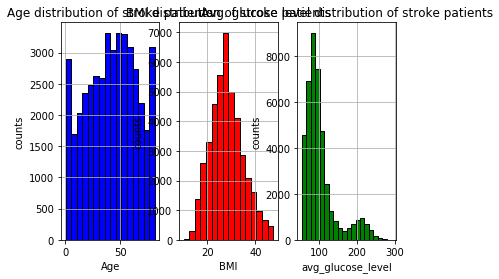

In [13]:
# Histogram: age
plt.subplot(1,3,1)
df_cleaned['age'].hist(bins=16, facecolor = 'blue', edgecolor='black')
plt.title('Age distribution of stroke patients')
plt.xlabel('Age')
plt.ylabel('counts')

# Histogram: bmi
plt.subplot(1,3,2)
df_cleaned['bmi'].hist(bins=16, facecolor = 'red', edgecolor='black')
plt.title('BMI distribution of stroke patients')
plt.xlabel('BMI')
plt.ylabel('counts')

# Histogram: avg_glucose_level
plt.subplot(1,3,3)
df_cleaned['avg_glucose_level'].hist(bins=20, facecolor = 'green', edgecolor='black')
plt.title('Avg. glucose level distribution of stroke patients')
plt.xlabel('avg_glucose_level')
plt.ylabel('counts')
plt.show()

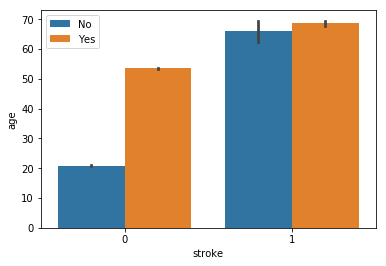

In [14]:
# Visualize categorical data #
###############################################################################
# Column charts: age of stroke patient by lifestyle factors
sns.barplot(x='stroke',y='age',hue='ever_married', data=df_cleaned)
plt.legend(loc='upper left')
plt.show()

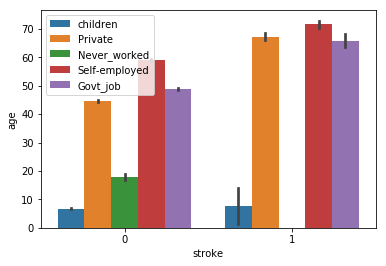

In [15]:
sns.barplot(y='age',x='stroke',hue='work_type', data=df_cleaned)
plt.legend(loc='upper left')
plt.show()

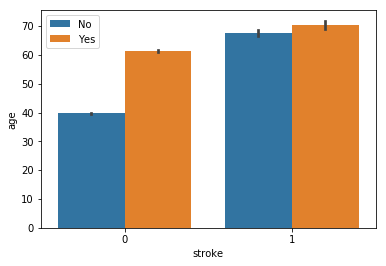

In [16]:
sns.barplot(x='stroke',y='age',hue='hypertension', data=df_cleaned)
plt.legend(loc='upper left')
plt.show()

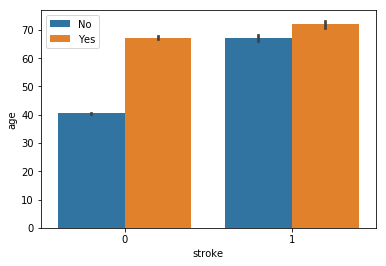

In [17]:
sns.barplot(x='stroke',y='age',hue='heart_disease', data=df_cleaned)
plt.legend(loc='upper left')
plt.show()

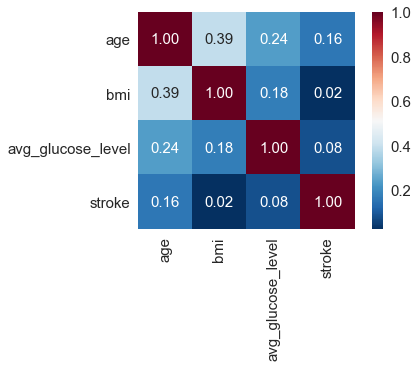

In [18]:
# Correlation Matrix Plot # entire dataset
###############################################################################
# Column names of cleaned dataframe
cols = ['age','bmi','avg_glucose_level','stroke']

# Plot correlation matrix heatmap
cm = np.corrcoef(df_cleaned[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm, cmap='RdBu_r', cbar=True,
                 annot=True, square=True, fmt='.2f',
                 annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
plt.show()

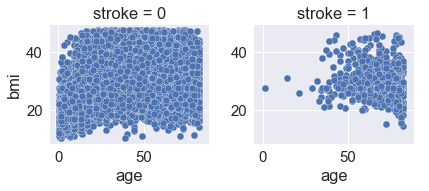

In [19]:
# Scatter Plot # entire dataset
###############################################################################
# Scatter Plot: bmi vs. age on stroke
s1 = sns.FacetGrid(df_cleaned, col='stroke')
s1 = (s1.map(plt.scatter, 'age', 'bmi', edgecolor='white').add_legend())
plt.show()

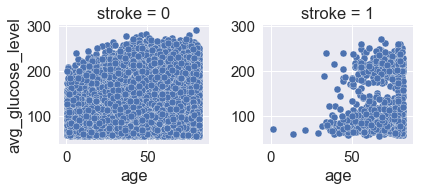

In [20]:
# Scatter Plot # entire dataset
###############################################################################
# Scatter Plot: bmi vs. avg_glucose_level on stroke
s1 = sns.FacetGrid(df_cleaned, col='stroke')
s1 = (s1.map(plt.scatter, 'age', 'avg_glucose_level', edgecolor='white').add_legend())
plt.show()

In [21]:
# Resampling: adjustment on imbalanced classes #
# Import libraries for resample
from sklearn.utils import resample

# Separate majority and minority classes
df_major = df_cleaned[df_cleaned.stroke == 0]
df_minor = df_cleaned[df_cleaned.stroke == 1]

# Test: Downsample majority class
# Downsample majority class: "0" non-stroke patients
df_major_downsampled = resample(df_major, 
                              replace=False, 
                              n_samples=772, 
                              random_state=0)

# Combine minority class with downsampled majority class:
df_downsampled = pd.concat([df_minor,df_major_downsampled], axis=0)

# Display new class counts:
df_downsampled.stroke.value_counts()

1    772
0    772
Name: stroke, dtype: int64

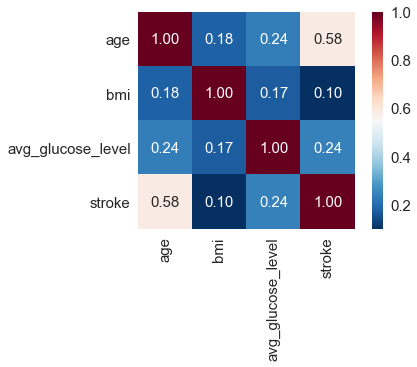

In [22]:
# Correlation Matrix Plot # downsampled dataset
###############################################################################
# CM plot of downsampled majority: "0" non-stroke patients
cm_downsampled = np.corrcoef(df_downsampled[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm_downsampled, cmap='RdBu_r', cbar=True,
                 annot=True, square=True, fmt='.2f',
                 annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
plt.show()

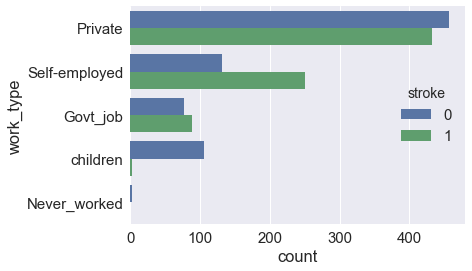

In [23]:
# Bar charts on lifestyle factors on stroke: downsampled
sns.countplot(y='work_type', hue='stroke', data=df_downsampled)
plt.show()

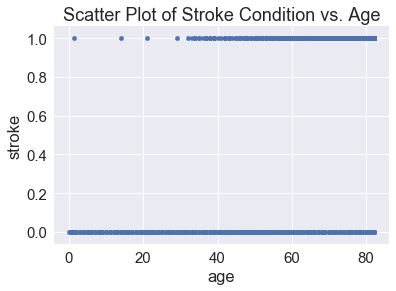

In [24]:
# Scatter Plot: downsampled
# Stroke vs. Age
df_downsampled.plot(kind='scatter', x='age', y='stroke', linestyle='None')
plt.title('Scatter Plot of Stroke Condition vs. Age')
plt.show()

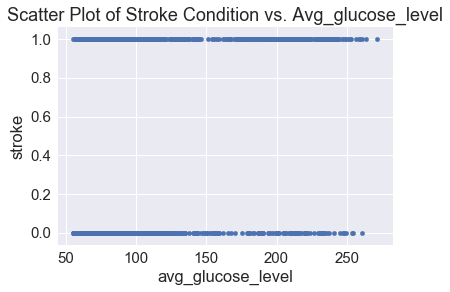

In [25]:
# Stroke vs. Avg_glucose_level
df_downsampled.plot(kind='scatter', x='avg_glucose_level', y='stroke', linestyle='None')
plt.title('Scatter Plot of Stroke Condition vs. Avg_glucose_level')
plt.show()

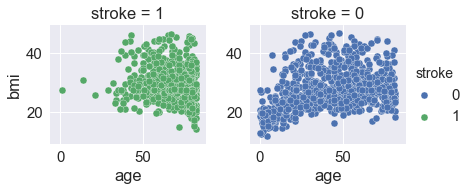

In [26]:
# Faceted Scatter Plot: downsampled 
# bmi vs. age by stroke 
_ = sns.FacetGrid(df_downsampled, col='stroke', hue='stroke', col_order=[1,0])
_ = (_.map(plt.scatter, 'age', 'bmi', edgecolor='white').add_legend())
plt.show()

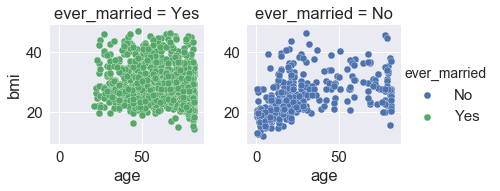

In [27]:
# bmi vs. age by marital_status 
_ = sns.FacetGrid(df_downsampled, col='ever_married', hue='ever_married', hue_order=['No','Yes'])
_ = (_.map(plt.scatter, 'age', 'bmi', edgecolor='white').add_legend())
plt.show()

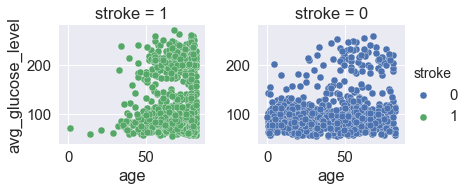

In [28]:
# avg_glucose_level vs. age by stroke
_ = sns.FacetGrid(df_downsampled, col='stroke', hue='stroke', col_order=[1,0])
_ = (_.map(plt.scatter, 'age', 'avg_glucose_level', edgecolor='white').add_legend())
plt.show()

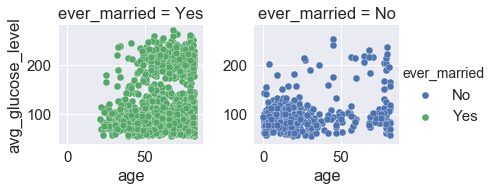

In [29]:
# avg_glucose_level vs. age by marital_status
_ = sns.FacetGrid(df_downsampled, col='ever_married', hue='ever_married', hue_order=['No','Yes'])
_ = (_.map(plt.scatter, 'age', 'avg_glucose_level', edgecolor='white').add_legend())
plt.show()